<a href="https://colab.research.google.com/github/chaitsugale/Cancer_Detection_CNN/blob/main/chaitanya_ugale_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN Assinment for Melanoma Detection

## Step 1 : Loading Package and Importing Files

In [2]:
# importing packages
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
#importing drive package
from google.colab import drive

In [4]:
#mounting content from google drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
#unzipping the file

!unzip gdrive/MyDrive/CNN_assignment

Archive:  gdrive/MyDrive/CNN_assignment.zip
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010512.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010889.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024468.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024470.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024511.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024646.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024654.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024707.jpg  
  inflating: Skin ca

In [6]:
# Defining the path for Train and Test

cancer_detection_train = pathlib.Path('/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train')

cancer_detection_test = pathlib.Path('/content/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [7]:
# checking the list

!ls

 drive	  sample_data
 gdrive  'Skin cancer ISIC The International Skin Imaging Collaboration'


In [8]:
# checking the image count for train and test

image_count_train = len(list(cancer_detection_train.glob('*/*.jpg')))
image_count_test = len(list(cancer_detection_test.glob('*/*.jpg')))

# printing the count
print('No. of image in Train : ',image_count_train)
print('No. of image in Test : ',image_count_test)

No. of image in Train :  2239
No. of image in Test :  118


## Step 2 : Creating Dataset

In [9]:
# Defining some parameter for the loader

batch_size = 32
image_height = 180
image_width = 180

In [10]:
# writing train dataset for cancer detection

cancer_detection_train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    cancer_detection_train,
    seed = 123,
    validation_split = 0.5,
    subset = 'training',
    image_size=(image_height,image_width),
    batch_size=batch_size

)

Found 2239 files belonging to 9 classes.
Using 1120 files for training.


In [11]:
# writing validation dataset for cancer detection

cancer_detection_valid_ds = tf.keras.preprocessing.image_dataset_from_directory(
    cancer_detection_train,
    seed = 123,
    validation_split = 0.5,
    subset = 'validation',
    image_size=(image_height,image_width),
    batch_size=batch_size

)

Found 2239 files belonging to 9 classes.
Using 1119 files for validation.


In [12]:
# Listing out class of skin diseases

cancer_class = cancer_detection_train_ds.class_names

In [13]:
print(cancer_class)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


## Step 3: Dataset Visualization

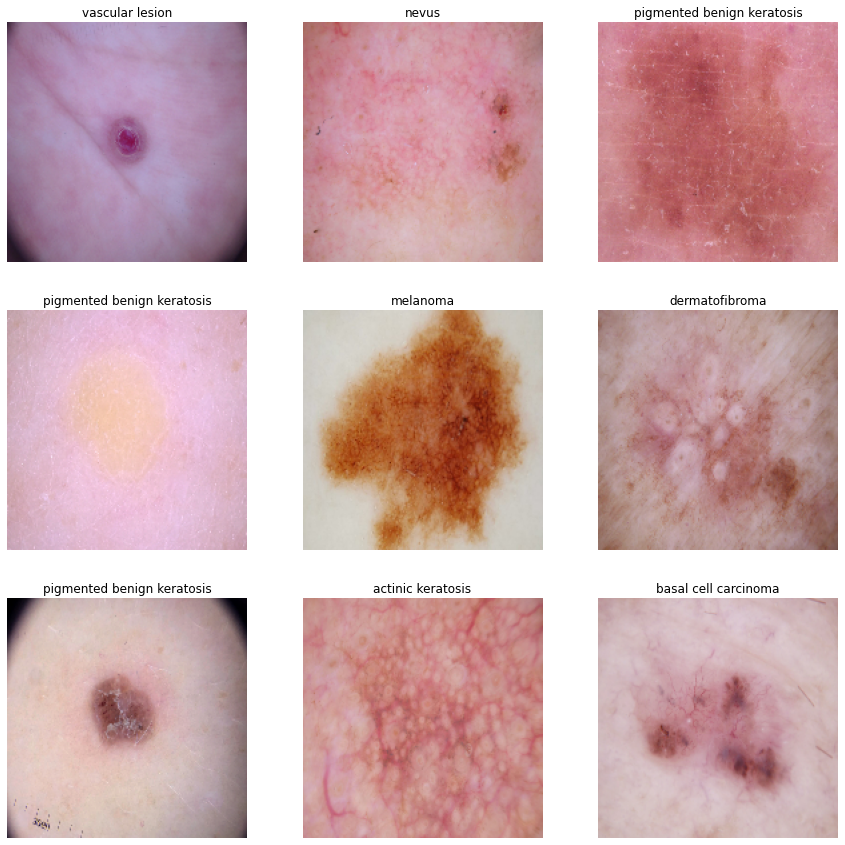

In [14]:
plt.figure(figsize=(15,15))

for cancer_image,cancer_labels in cancer_detection_train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(cancer_image[i].numpy().astype('uint8'))
    plt.title(cancer_class[cancer_labels[i]])
    plt.axis('off')


In [15]:
# Speeding Up Training Dataset to overlap data preprocessing and model execution while training

cancer_data_autotune = tf.data.experimental.AUTOTUNE

cancer_detection_train_ds = cancer_detection_train_ds.cache().shuffle(2000).prefetch(buffer_size=cancer_data_autotune)

cancer_detection_valid_ds = cancer_detection_valid_ds.cache().prefetch(buffer_size=cancer_data_autotune)



## Step 4 : Model Building and Training 

**Creating Model**

In [18]:
cancer_num_class = 9

cancer_model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255,input_shape=(image_height,image_width,3)),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(cancer_num_class)
]
)

In [20]:
cancer_num_class = 9

cancer_model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(image_height, image_width, 3)),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  #We slide over the feature map and extract tiles of a specified size. 
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  #We slide over the feature map and extract tiles of a specified size. 
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  #We slide over the feature map and extract tiles of a specified size. 
  layers.MaxPooling2D(),
  #Advantages of downsampling - Decreased size of input for upcoming layers, Works against overfitting
  layers.Flatten(),
  #Flattening - Convert into 1D feature vector.  Flattens all its structure to create a single long feature vector
  layers.Dense(128, activation='relu'),
  #Dense Layer - A dense layer represents a matrix vector multiplication.  each input node is connected to each output node.
  layers.Dense(cancer_num_class)
  #Dense Layer - A dense layer represents a matrix vector multiplication.  each input node is connected to each output node.
])

**Compiling the model**

In [21]:
cancer_model.compile(optimizer='adam',
                     loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                     metrics=['accuracy'])

In [22]:
cancer_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 64)      1792      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 90, 90, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 90, 90, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 45, 45, 128)      0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 45, 45, 64)       

**Model Training**

In [23]:
epochs = 20

cancer_history = cancer_model.fit(
    cancer_detection_train_ds,
    validation_data = cancer_detection_valid_ds,
    epochs = epochs
)

Epoch 1/20
35/35 [==============================] - 29s 347ms/step - loss: 2.0430 - accuracy: 0.2375 - val_loss: 1.9119 - val_accuracy: 0.3029
Epoch 2/20
35/35 [==============================] - 6s 162ms/step - loss: 1.8250 - accuracy: 0.3464 - val_loss: 1.7442 - val_accuracy: 0.4272
Epoch 3/20
35/35 [==============================] - 6s 163ms/step - loss: 1.5859 - accuracy: 0.4446 - val_loss: 1.6154 - val_accuracy: 0.4638
Epoch 4/20
35/35 [==============================] - 6s 163ms/step - loss: 1.5501 - accuracy: 0.4616 - val_loss: 1.5786 - val_accuracy: 0.4513
Epoch 5/20
35/35 [==============================] - 6s 163ms/step - loss: 1.4192 - accuracy: 0.4973 - val_loss: 1.4991 - val_accuracy: 0.4835
Epoch 6/20
35/35 [==============================] - 6s 166ms/step - loss: 1.2925 - accuracy: 0.5536 - val_loss: 1.5308 - val_accuracy: 0.4754
Epoch 7/20
35/35 [==============================] - 6s 163ms/step - loss: 1.2610 - accuracy: 0.5589 - val_loss: 1.5855 - val_accuracy: 0.4736
Epoch

**Visualizing Training Result**

In [24]:
#Declaring Accuracy
cancer_accuracy = cancer_history.history['accuracy']

cancer_valid_accuracy = cancer_history.history['val_accuracy']

#Declaring Loss
cancer_loss = cancer_history.history['loss']

cancer_valid_loss = cancer_history.history['val_loss']

epochs_range = range(epochs)


Text(0.5, 1.0, 'Cancer Training and Validation Loss')

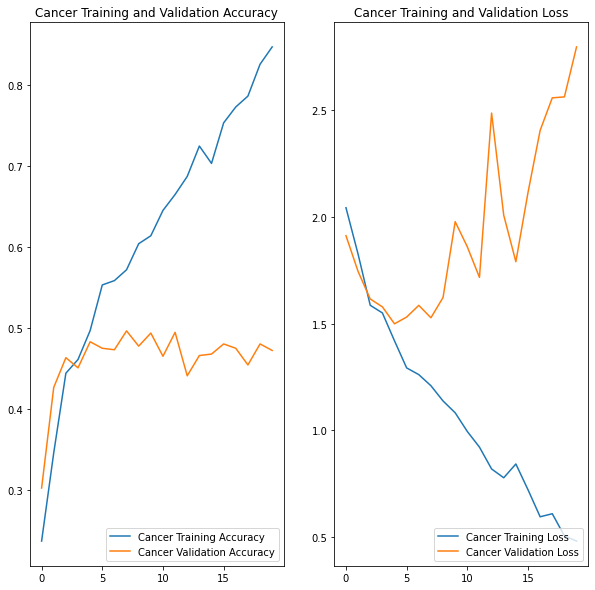

In [28]:
# Plotting Graph for Accuracy and Loss

#Graph for accuracy

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.plot(epochs_range,cancer_accuracy,label='Cancer Training Accuracy')
plt.plot(epochs_range,cancer_valid_accuracy,label='Cancer Validation Accuracy')
plt.legend(loc='lower right')
plt.title("Cancer Training and Validation Accuracy")

#Graph for Loss

plt.subplot(1,2,2)
plt.plot(epochs_range,cancer_loss,label='Cancer Training Loss')
plt.plot(epochs_range,cancer_valid_loss,label='Cancer Validation Loss')
plt.legend(loc='lower right')
plt.title("Cancer Training and Validation Loss")

In [34]:
cancer_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical", 
                                                 input_shape=(image_height, 
                                                              image_width,
                                                              3)),
    #layers.experimental.preprocessing.RandomRotation(0.6),
    layers.experimental.preprocessing.RandomZoom(height_factor=(-0.1, 0.1), width_factor=(-0.1, 0.1), fill_mode='constant'),
  ]
)

In [43]:
cancer_image_batch = tf.cast(tf.expand_dims(cancer_image[0],0),tf.float32)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


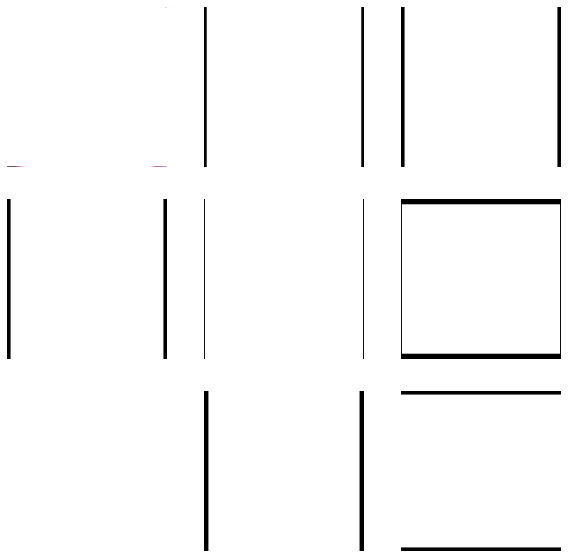

In [45]:
plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = cancer_augmentation(cancer_image_batch)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0])
  plt.axis("off")

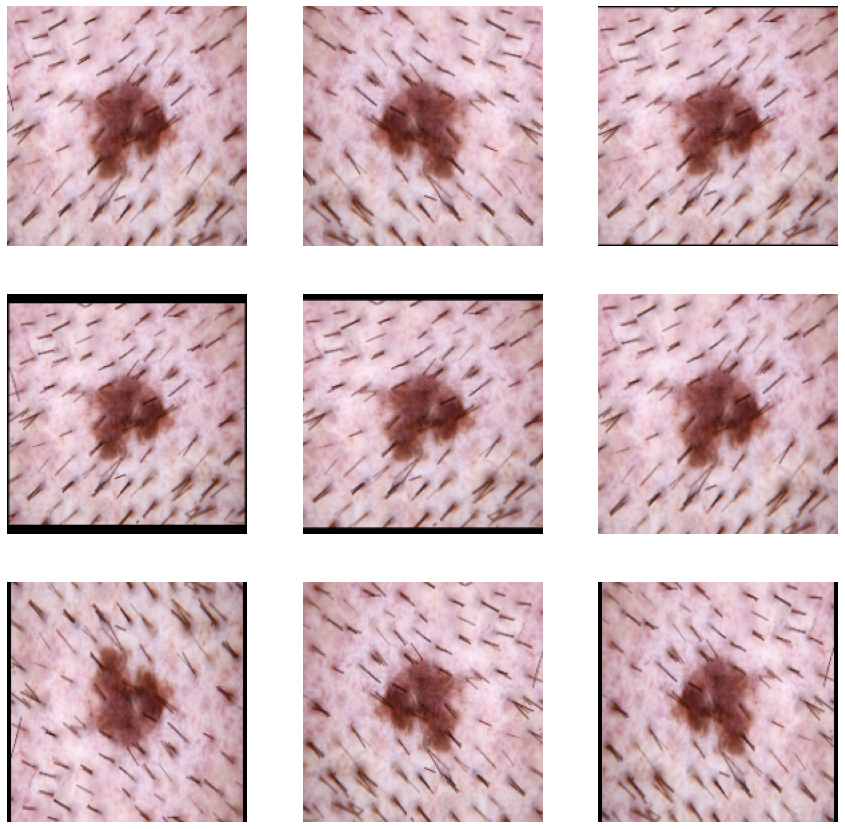

In [49]:
plt.figure(figsize=(15,15))

for image,_ in cancer_detection_train_ds.take(1):
  for i in range(9):
    augmented_images = cancer_augmentation(image)
    ax = plt.subplot(3,3,i+1)
    plt.imshow(augmented_images[0].numpy().astype('uint8'))
    plt.axis('off')